<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#### Read the data

Load the csv file and print the first five observations.

In [2]:
data_bank=pd.read_csv('bank_churn.csv')
data_bank.head()

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
0,619,France,Female,42,2,0.000000,1,1,1
1,608,Spain,Female,41,1,83807.860000,1,0,0
2,502,France,Female,42,8,159660.800000,3,1,1
3,699,France,Female,39,1,0.000000,2,0,0
4,850,Spain,Female,43,2,125510.820000,1,1,0


In [3]:
data_bank.shape

(9920, 9)

In [4]:
data_bank.dtypes

CreditScore           int64
Geography            object
Gender               object
Age                   int64
NumOfYrsWithBank      int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
Closed_Acc            int64
dtype: object

In [5]:
data_bank.describe()

,CreditScore,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
count,9920.000000,9920.000000,9920.000000,9920.000000,9920.000000,9920.000000,9920.000000
mean,650.804536,38.768347,5.006351,76477.336143,1.529940,0.705847,0.203831
std,96.119083,10.129247,2.890735,62407.729207,0.581073,0.455684,0.402865
min,382.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97221.520000,1.000000,1.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,0.000000
max,850.000000,75.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


In [6]:
data_bank.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'NumOfYrsWithBank',
       'Balance', 'NumOfProducts', 'HasCrCard', 'Closed_Acc'],
      dtype='object')

In [7]:
data_bank.isnull().sum()/len(data_bank)

CreditScore        0.000000
Geography          0.000000
Gender             0.000000
Age                0.000000
NumOfYrsWithBank   0.000000
Balance            0.000000
NumOfProducts      0.000000
HasCrCard          0.000000
Closed_Acc         0.000000
dtype: float64

In [8]:
df_num=data_bank.select_dtypes(np.number).drop('Closed_Acc',axis=1)

In [9]:
df_cat=data_bank.select_dtypes(include=object)

In [58]:
df1 = pd.get_dummies(data_bank,drop_first=True)

In [60]:
df1.head()

,CreditScore,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000000,1,1,1,0,0,0
1,608,41,1,83807.860000,1,0,0,0,1,0
2,502,42,8,159660.800000,3,1,1,0,0,0
3,699,39,1,0.000000,2,0,0,0,0,0
4,850,43,2,125510.820000,1,1,0,0,1,0


Our objective is to predict whether the customer has closed the bank account or not.

**The data definition is as follows:** <br>

**CreditScore**: Credit score of the customer 

**Geography**: Resident country of the customer

**Gender**: Gender of the customer

**Age**: Age of the customer

**NumOfYrsWithBank**: Years for which the customer has been with the bank

**Balance**: Bank balance of the customer in Euro

**NumOfProducts**: Number of bank facilities for which customer has opted

**HasCrCard**: Whether the customer has credit card or not (1 = Yes, 0 = No)

**Closed_Acc**: Whether the customer has closed the bank account or not (1 = Yes, 0 = No) (target/dependent variable)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full logistic model and calculate the odds for each variable (consider the probability  threshold as 0.25)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
x = df1.drop('Closed_Acc',axis=1)
y = df1.Closed_Acc
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
prob = model.predict_proba(x_test)[:,1]
ypred = [0 if i < 0.25 else 1 for i in prob]
np.exp(model.coef_)

array([[0.9946409 , 1.04722301, 0.99847219, 1.00000355, 0.99951542,
        0.99978378, 1.00098042, 0.99964466, 0.99886817]])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Calculate the Specificity and Sensitivity from the confusion matrix of the full model (consider the probability threshold as 0.25)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
x = df1.drop('Closed_Acc',axis=1)
y = df1.Closed_Acc
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
prob = model.predict_proba(x_test)[:,1]
ypred = [0 if i < 0.25 else 1 for i in prob]
cm = confusion_matrix(y_test,ypred)
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
specificity = TN/(TN+FP)
sensitivity = TP/(TP+FN)
print('specificity',round(specificity,2))
print('sensitivity',round(sensitivity,2))

specificity 0.75
sensitivity 0.5


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a logistic model on the 6 features obtained by RFE and plot the ROC curve 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=lr,n_features_to_select=6)
mod_rfe = rfe.fit(x_train,y_train)
d = pd.Series(mod_rfe.ranking_,index=x_train.columns)
d[d==1].index

Index(['Age', 'NumOfProducts', 'HasCrCard', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

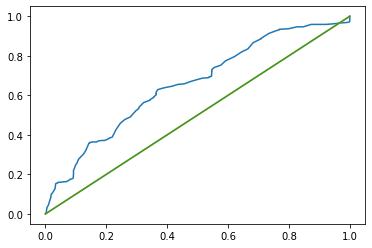

In [68]:
x = df1[['Geography_Germany', 'Gender_Male', 'NumOfYrsWithBank','NumOfProducts', 'NumOfProducts', 'NumOfProducts']]
y = df1.Closed_Acc
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
prob = model.predict_proba(x_test)[:,1]
fpr,tpr,th = roc_curve(y_test,prob)
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Obtain the optimal value of cut-off probability for the full model using the Youden's index 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [70]:
x = df1
y = df1.Closed_Acc
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
prob = model.predict_proba(x_test)[:,1]
fpr,tpr,th = roc_curve(y_test,prob)
t = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':th})
t['YI'] = t.TPR-t.FPR
t.sort_values(by='YI',ascending=False).head(1)

,FPR,TPR,Threshold,YI
2,0.000000,1.000000,0.679531,1.000000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Consider the cut-off probability obtained from Youden's index for the full model and calculate the following measures:<br>
                    a. f-1 score <br>
                    b. Accuracy<br>
                    c. Kappa Score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [72]:
x = df1
y = df1.Closed_Acc
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
prob = model.predict_proba(x_test)[:,1]
ypred = [0 if i < 0.22 else 1 for i in prob]
print('accuracy_score',round(accuracy_score(y_test,ypred),2))
print('cohen_kappa_score',round(cohen_kappa_score(y_test,ypred),2))
print('classification_report')
print(classification_report(y_test,ypred))

accuracy_score 1.0
cohen_kappa_score 1.0
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1572
           1       1.00      1.00      1.00       412

    accuracy                           1.00      1984
   macro avg       1.00      1.00      1.00      1984
weighted avg       1.00      1.00      1.00      1984



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Identify the variables involved in multicollinearity 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
df_num = data_bank.select_dtypes(include=np.number)

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
for i in range(len(df_num.columns)): 
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]
    vif["Features"] = df_num.columns
    multi = vif[vif['VIF_Factor'] > 10]
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    if (df_sorted.empty == False):
        df_num = df_num.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor          Features
0    9.238317               Age
1    3.653371  NumOfYrsWithBank
2    2.408619           Balance
3    6.052172     NumOfProducts
4    3.146990         HasCrCard
5    1.375897        Closed_Acc


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a logistic regression model using the categorical variables and the variables obtained after calculating VIF. Also,compute the ROC_AUC score (consider the cut-off probability as 0.6)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [80]:
# type your code here

x = df1.drop('CreditScore',axis=1)
y = df1.Closed_Acc
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
prob = model.predict_proba(x_test)[:,1]
ypred = [0 if i < 0.6 else 1 for i in prob]
print('roc_auc_score',round(roc_auc_score(y_test,ypred),2))

roc_auc_score 0.5


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Consider the costs of false negatives and false positives as 2 and 0.5 respectively to obtain the optimal cut-off probability for which the total cost will be minimum
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [83]:
x = df1.drop('Closed_Acc',axis=1)
y = df1.Closed_Acc
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
prob = model.predict_proba(x_test)

th=np.arange(0.1,1,0.1)
total_cost=[]

for i in th:
    pred = [0 if x <= i else 1 for x in prob[:,1]]
    cm = confusion_matrix(y_test,pred)
    fn = cm[1,0]
    fp = cm[0,1]
    cost = fn*2+fp*0.5
    total_cost.append(cost)
    
df = pd.DataFrame({'Threshold':th,'Total_cost':total_cost})
df.sort_values(by='Total_cost',ascending=True).head(1)
#min value when working with errors 

,Threshold,Total_cost
1,0.200000,603.000000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a full logistic model using the optimal cut-off probability obtained in Q8. Also, plot the confusion matrix and compute ROC_AUC score  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [86]:
x = df1.drop('Closed_Acc',axis=1)
y = df1.Closed_Acc
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
prob = model.predict_proba(x_test)[:,1]
ypred = [0 if i < 0.2 else 1 for i in prob]
print(confusion_matrix(y_test,ypred))
print('ROC_AUC',round(roc_auc_score(y_test,ypred),2))

[[956 616]
 [145 267]]
ROC_AUC 0.63
